In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')
# Importing all the required libraries

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df
#Loaded the data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Upon preliminary analysis of Dataset, we can assume that the datatypes of both Dependent and Independent Variables are continous type

W   = Output Features = Number of predicted wins (W)
R   = Input Feature   = Runs scored: times reached home plate legally and safely
AB  = Input Feature   = At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
H   = Input Feature   = Hit: reaching base because of a batted, fair ball without error by the defense
2B  = Input Feature   = Double: hits on which the batter reaches second base safely without the contribution of a fielding error
3B  = Input Feature   = Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
HR  = Input Feature   = Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
BB  = Input Feature   = Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
SO  = Input Feature   = Strike out: number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
SB  = Input Feature   = Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense 
RA  = Input Feature   = Run average: number of runs allowed times nine divided by innings pitched
ER  = Input Feature   = Earned run: number of runs that did not occur as a result of errors or passed balls
ERA = Input Feature   = Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
CG  = Input Feature   = Complete game: number of games where player was the only pitcher for their team
SHO = Input Feature   = Shutout: number of complete games pitched with no runs allowed
SV  = Input Feature   = Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
E   = Input Feature   = Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

W   - Number of predicted wins (W)
R   - Runs
AB  - At Bats
H   - Hits
2B  - Doubles
3B  - Triples
HR  - Homeruns
BB  - Walks
SO  - Strikeouts
SB  - Stolen Bases
RA  - Runs Allowed
ER  - Earned Runs
ERA - Earned Run Average
CG  - Complete Games
SHO - Shutouts
SV  - Saves
E   - Errors

### Renaming the Features along with Target Variable Column Name to Recognizable/ Easily identifiable Names

In [16]:
df.columns = ['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Complete Games', 'Shutouts', 'Saves', 'Errors']
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [17]:
df.shape

(30, 17)

There are 30 Rows and 17 Columns including the Target in this Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

Only the Earned Run Average is in float type and all remaining columns are in in Int type. 

#### Checking Null Values in the dataset 

In [19]:
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

There are no Null Values or missing values in the dataset.

### Analyzing the Basic Statistics of the Dataset

In [20]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Checking unique values in columns

In [21]:
df.nunique()

Wins                  24
Runs                  28
At Bats               29
Hits                  29
Doubles               22
Triples               23
Homeruns              27
Walks                 29
Strikeouts            29
Stolen Bases          27
Runs Allowed          30
Earned Runs           30
Earned Run Average    30
Complete Games         9
Shutouts              12
Saves                 20
Errors                21
dtype: int64

Target Variable Wins is a continous Datatype. Therefore dataset will be treated as Regression Problem.

#### Analyzing Distribution of data on both Target and Feature Columns

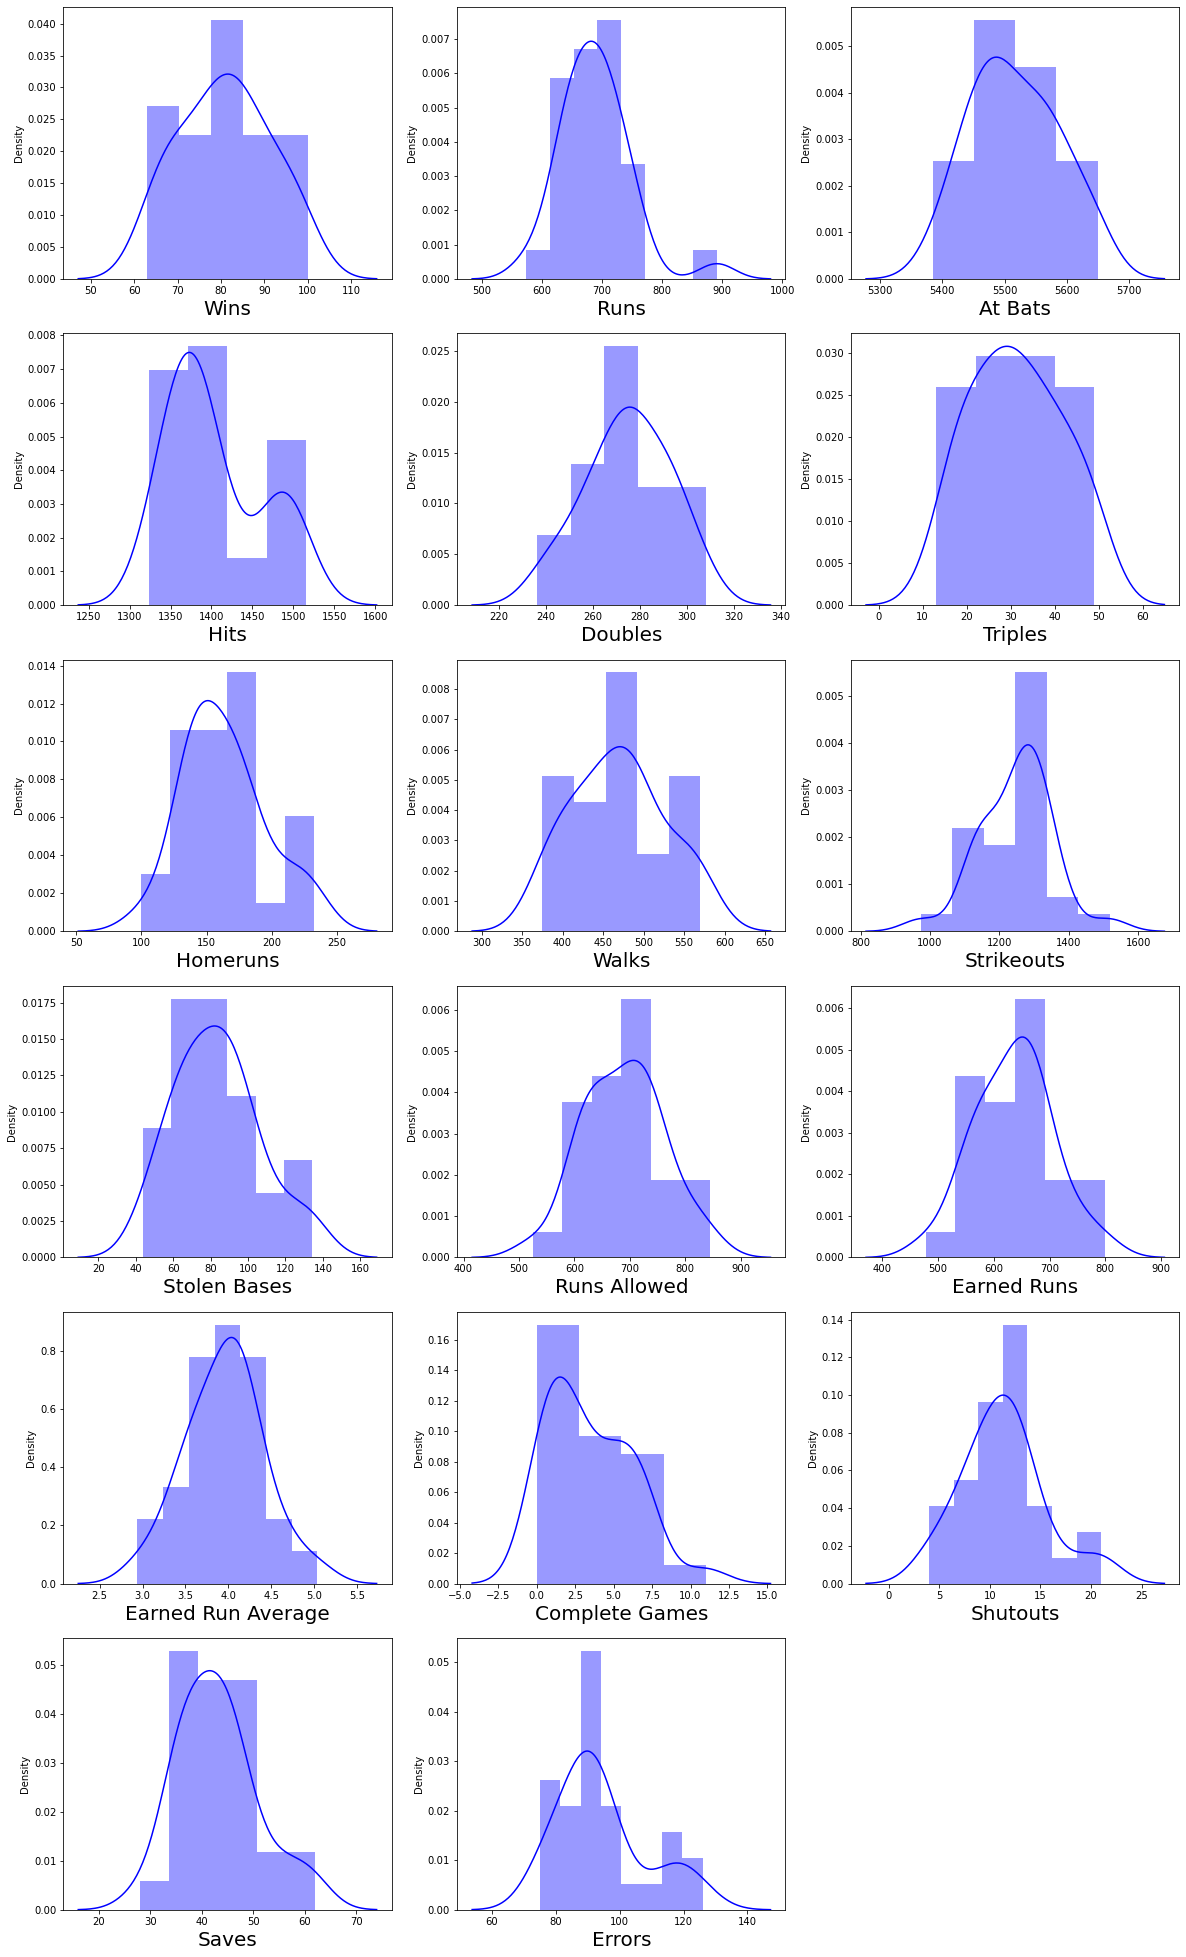

In [22]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in df:
    if plot_number <=18:
        plt.subplot(6,3,plot_number)
        sns.distplot(df[i], color = 'blue')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

We can see there might be skewness in few columns since those columns are not normally distributed. Runs, Hits, Complete Games, Errors column data have skewness. Homeruns, Shutouts, Stolen Bases, Saves Column might have skewed data.

#### Checking the Skewness for Dataset

In [23]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

7 Columns data are skewed, i.e out of -0.50 to +0.50 Range Runs. Errors Column Data are highly skewed. Hits, Shutouts, Saves, Complete Games column data have less skewed.

#### Checking the relationship between independent variable and Target Variable

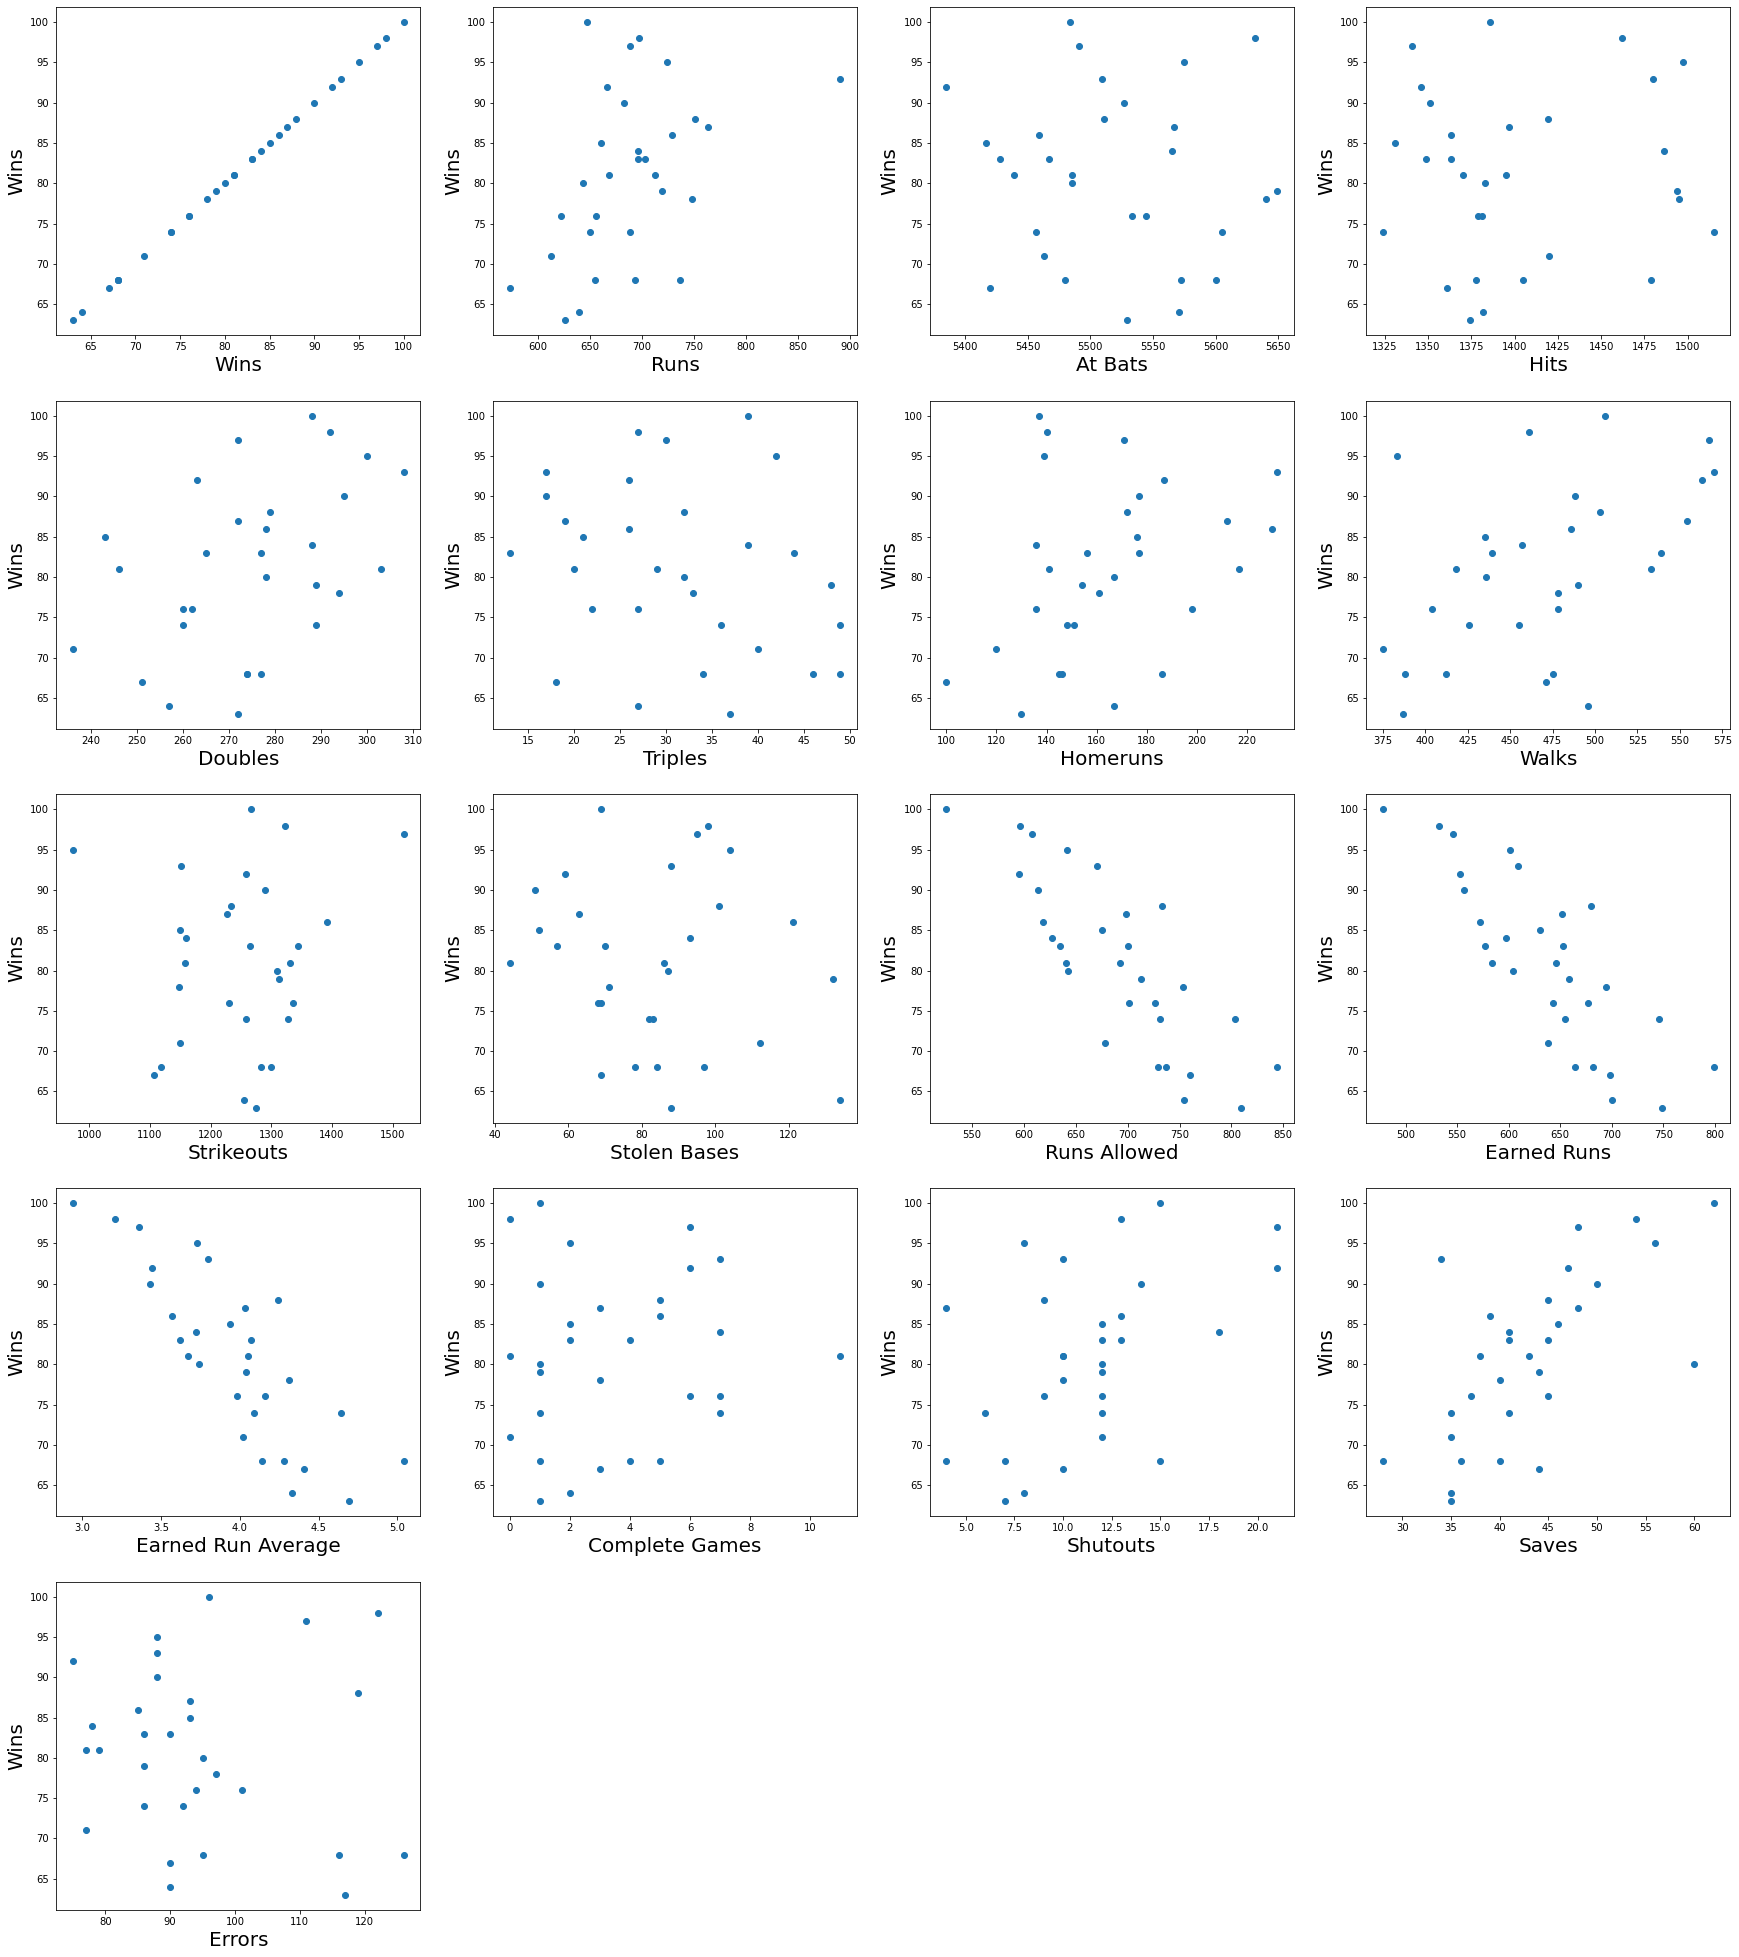

In [24]:
plt.figure(figsize=(30,35),facecolor='white')
plot_number=1
for i in df.columns:
    if plot_number<=len(df.columns):
        ax=plt.subplot(5,4,plot_number)
        plt.scatter(df[i],df['Wins'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plot_number+=1
plt.show()

* Runs, Doubles, Homeruns, Walks, Shutouts and Saves Column data has linear relationship with Win Column data in positive way.
   So, these column data will have positive correlation.
   
*  Runs Allowed, Earned Runs, Earned Runs Average data has linear relationship with Win Column data in negative way.
   So, these column data will have negative correlation.
   

* Complete Games, Errors, Stolen Bases, Strikeouts, Triples, Hits, At Bats have very less correlation with Win Column Data

#### Checking Correlation

In [25]:
corr_mat=df.corr()
corr_mat

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


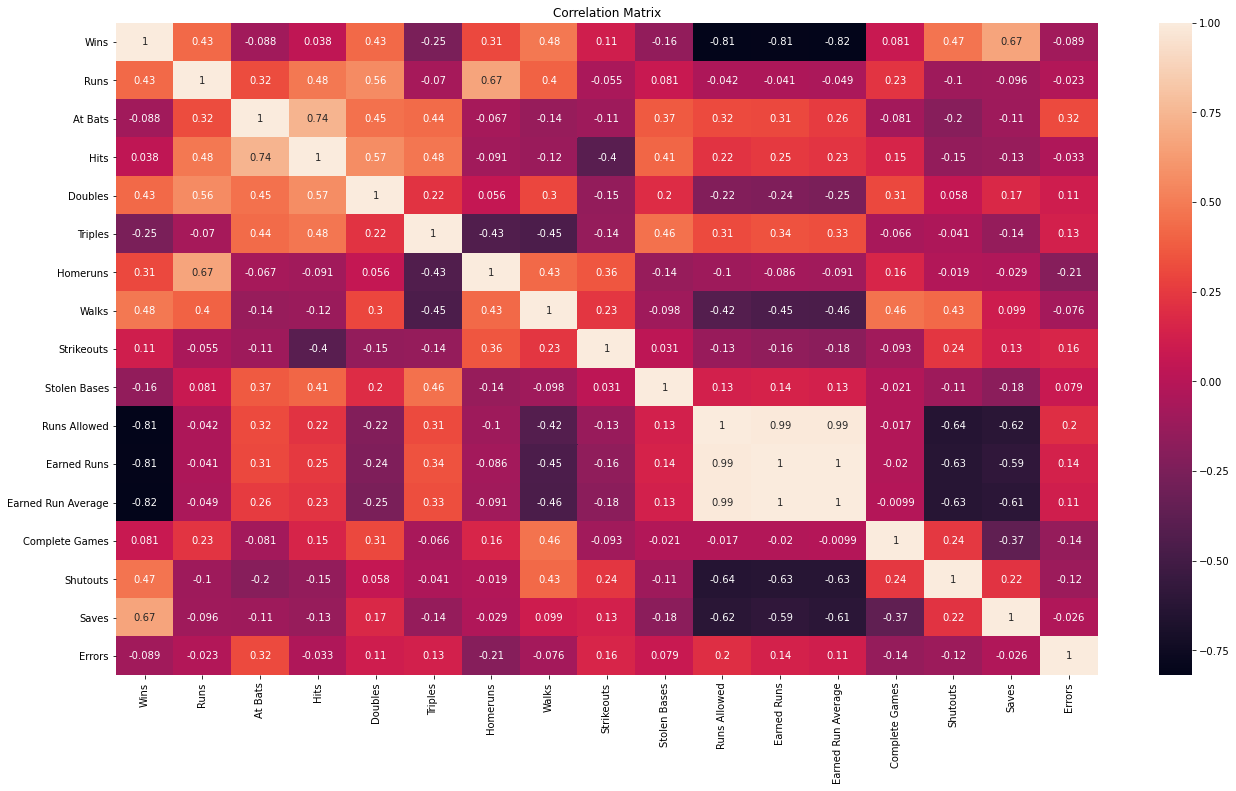

In [26]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Wins have strong correlation with the "saves". And less correlation with the Hits, AT Bats and triples.

<AxesSubplot:>

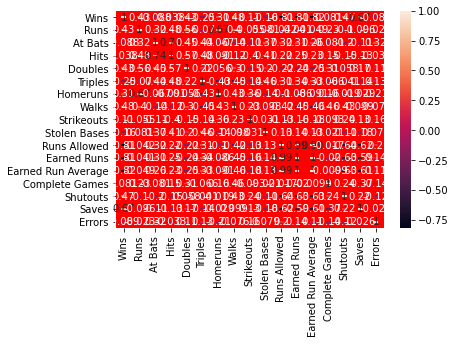

In [27]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='r')

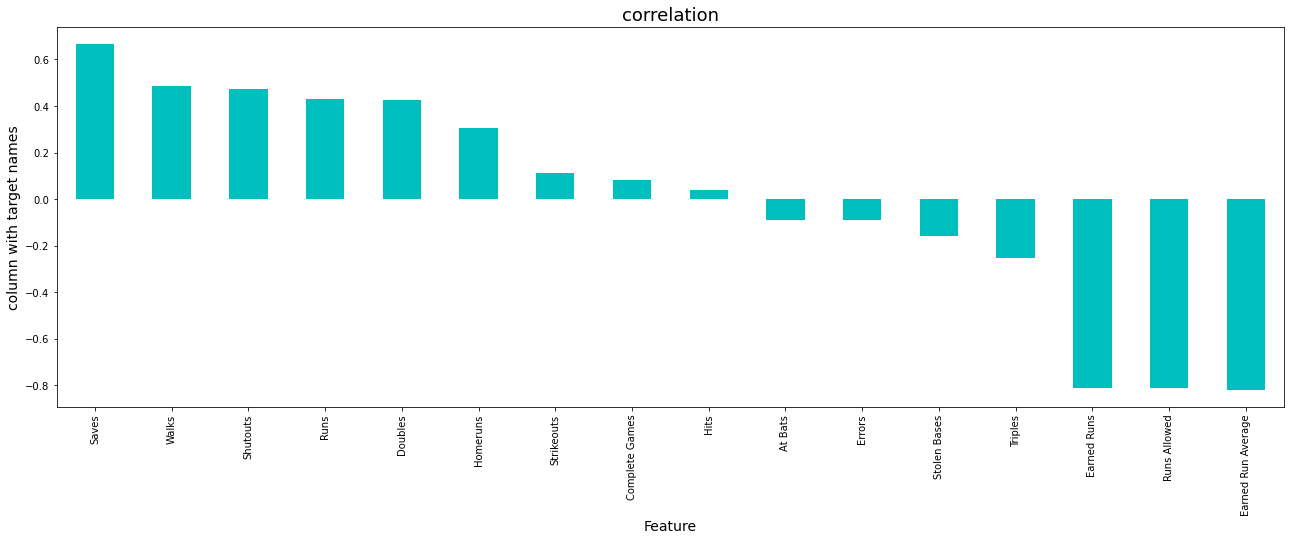

In [28]:
plt.figure(figsize=(22,7))
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

The above fig shows how much the indipendent columns are related with target variable wins.

In [29]:
corr_mat["Wins"].sort_values(ascending=False)

Wins                  1.000000
Saves                 0.666530
Walks                 0.484342
Shutouts              0.471805
Runs                  0.430751
Doubles               0.427797
Homeruns              0.307407
Strikeouts            0.111850
Complete Games        0.080533
Hits                  0.037612
At Bats              -0.087947
Errors               -0.089485
Stolen Bases         -0.157234
Triples              -0.251118
Earned Runs          -0.809435
Runs Allowed         -0.812952
Earned Run Average   -0.819600
Name: Wins, dtype: float64

Using Heatmap, Correlation Matrix we can conclude that prediction done through scatter plots are true almost.
Saves, Walks, Shutouts, Runs, Doubles, Homeruns are positively correlated with Win Column data (in Positive Correlation Descending Order)
Earned Run Average, Runs Allowed, Earned Runs are negatively correlated with Win Column data (in Negative Correlation Descending Order)
Strikeouts, Stolen Bases, Triples column data has less correlation with Win Column Data
Complete Games, Hits, At Bats, Errors column data are very less correlated to Win Column Data. If the Model Accuracy is less, these columns can be dropped because of very less correlationship with Target Variable

#### Checking for Outliers using boxplots 

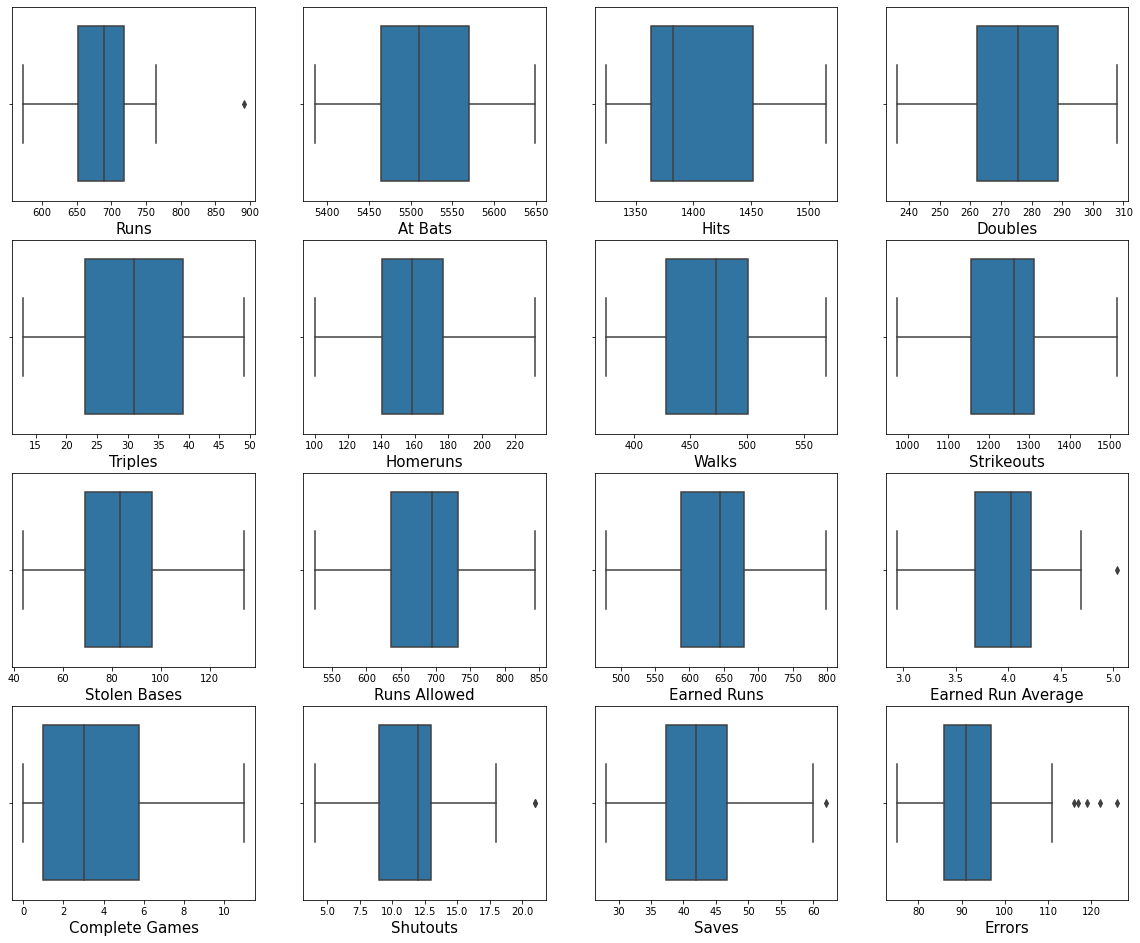

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plot_number=1
for i in df.drop(columns = ['Wins'], axis = 1):
    if plot_number<=len(df.columns):
        plt.subplot(6,4,plot_number)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    plot_number+=1
plt.show()

From above plots, we can confirm that there are outliers in Runs, Earned Run Average, Shutouts, Saves and Errors Column Data

### Outliers Removal

##### Using ZScore Method to remove the Outliers

In [31]:
df_outlier_removal=df.copy()

Copying dataset to new file

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df_outlier_removal))
df_zscore=df_outlier_removal[(z<3).all(axis=1)]

Applying zscore to remove the Outliers

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [33]:
df_zscore.shape

(29, 17)

##### Original Dataset Shape before Outliers removal

In [34]:
df_outlier_removal.shape

(30, 17)

In [35]:
zscore_data_loss=((30-29)/30)*100
zscore_data_loss

3.3333333333333335

3.33% of Data loss occured after using ZScore Method.

##### Outliers through Boxplots after using Zscore

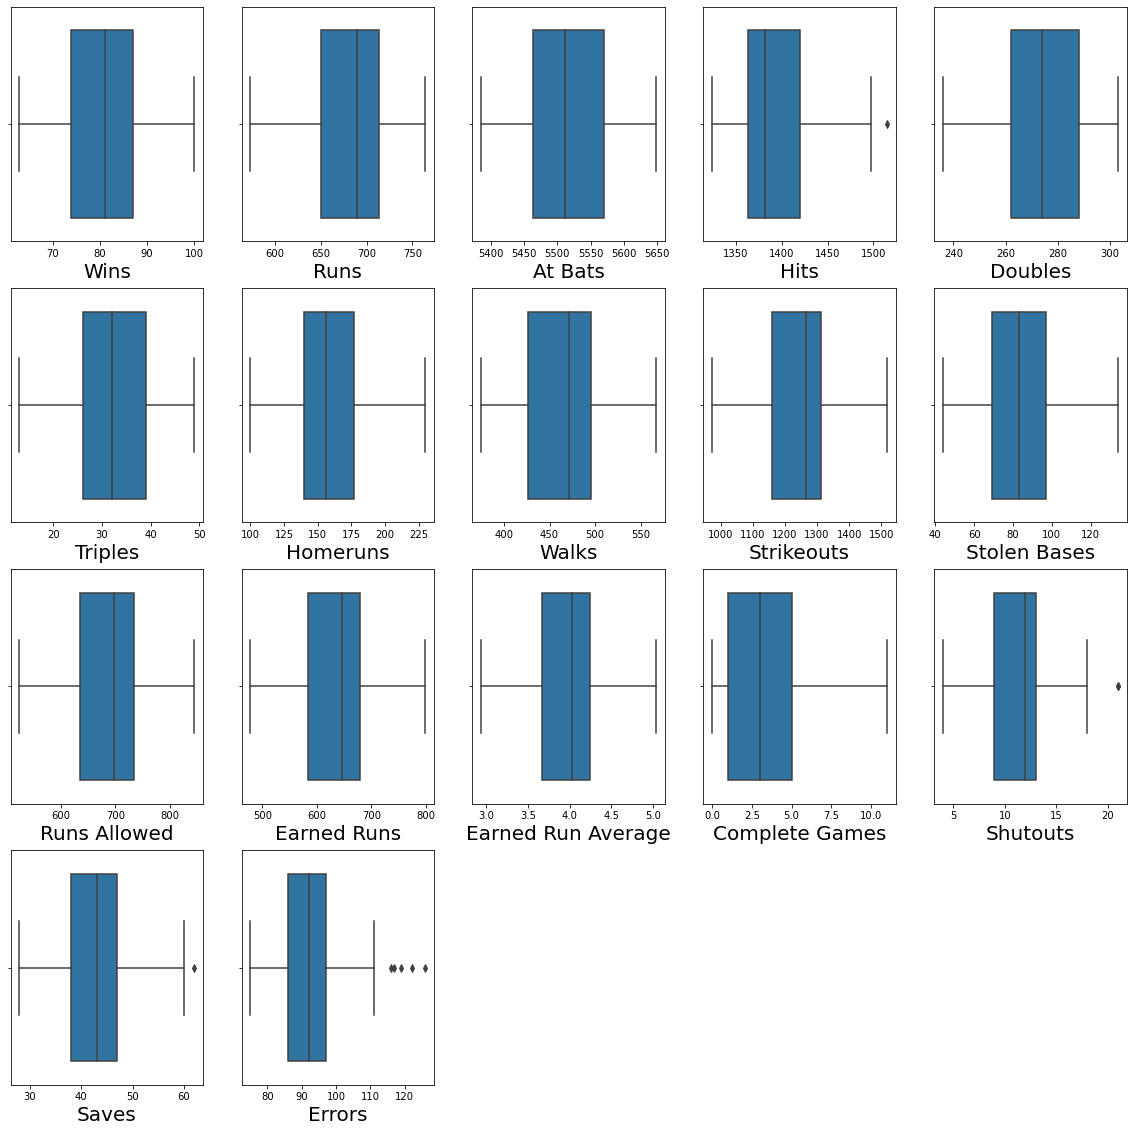

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plot_number=1
for i in df_zscore.columns:
    if plot_number<=len(df_zscore.columns):
        plt.subplot(5,5,plot_number)
        sns.boxplot(df_zscore[i])
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.show()

Upon reviewing above boxplots, found some Outliers is removed in Runs, Earned Run Average Columns

### Removing Skewness 

#### 1. Using CBRT Technique

In [37]:
df_zscore_cbrt = df_zscore.copy()

Copying the dataset to new name for CBRT Technique

In [38]:
df_zscore.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games        0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

In [39]:
df_zscore_cbrt.skew()
print(len(df_zscore_cbrt.skew().loc[df_zscore_cbrt.skew()>0.55]))
for index in df_zscore_cbrt.skew().index:
    if df_zscore_cbrt.skew().loc[index] >0.55:
        df_zscore_cbrt[index]=np.cbrt( df_zscore_cbrt[index])

4


In [40]:
df_zscore_cbrt.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.753696
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games       -1.013981
Shutouts              0.526943
Saves                 0.280963
Errors                0.671748
dtype: float64

Saves, Errors Data Skewness is reduced. Hits Data skewness is reduced less and Complete Games Skewness is increased.

#### 2. Using Power Transformer Technique

In [41]:
df_zscore_powertransformer = df_zscore.copy()

Copying the dataset to new name for Power Transformer Technique

In [42]:
df_zscore_powertransformer.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games        0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

In [43]:
pt=PowerTransformer()
for i in df_zscore_powertransformer.columns:
    if abs(df_zscore_powertransformer.loc[:,i].skew())>0.55:
        df_zscore_powertransformer.loc[:,i]=pt.fit_transform(df_zscore_powertransformer.loc[:,i].values.reshape(-1,1))

In [44]:
df_zscore_powertransformer.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games       -0.045947
Shutouts              0.526943
Saves                -0.000925
Errors                0.065585
dtype: float64

Complete Games, Saves, Errors Data Skewness is reduced highly. Hits Data skewness is reduced to 0 and Model Accuracy with these skewed data is low. So, proceeding with CBRT Technique for Skewness Correction

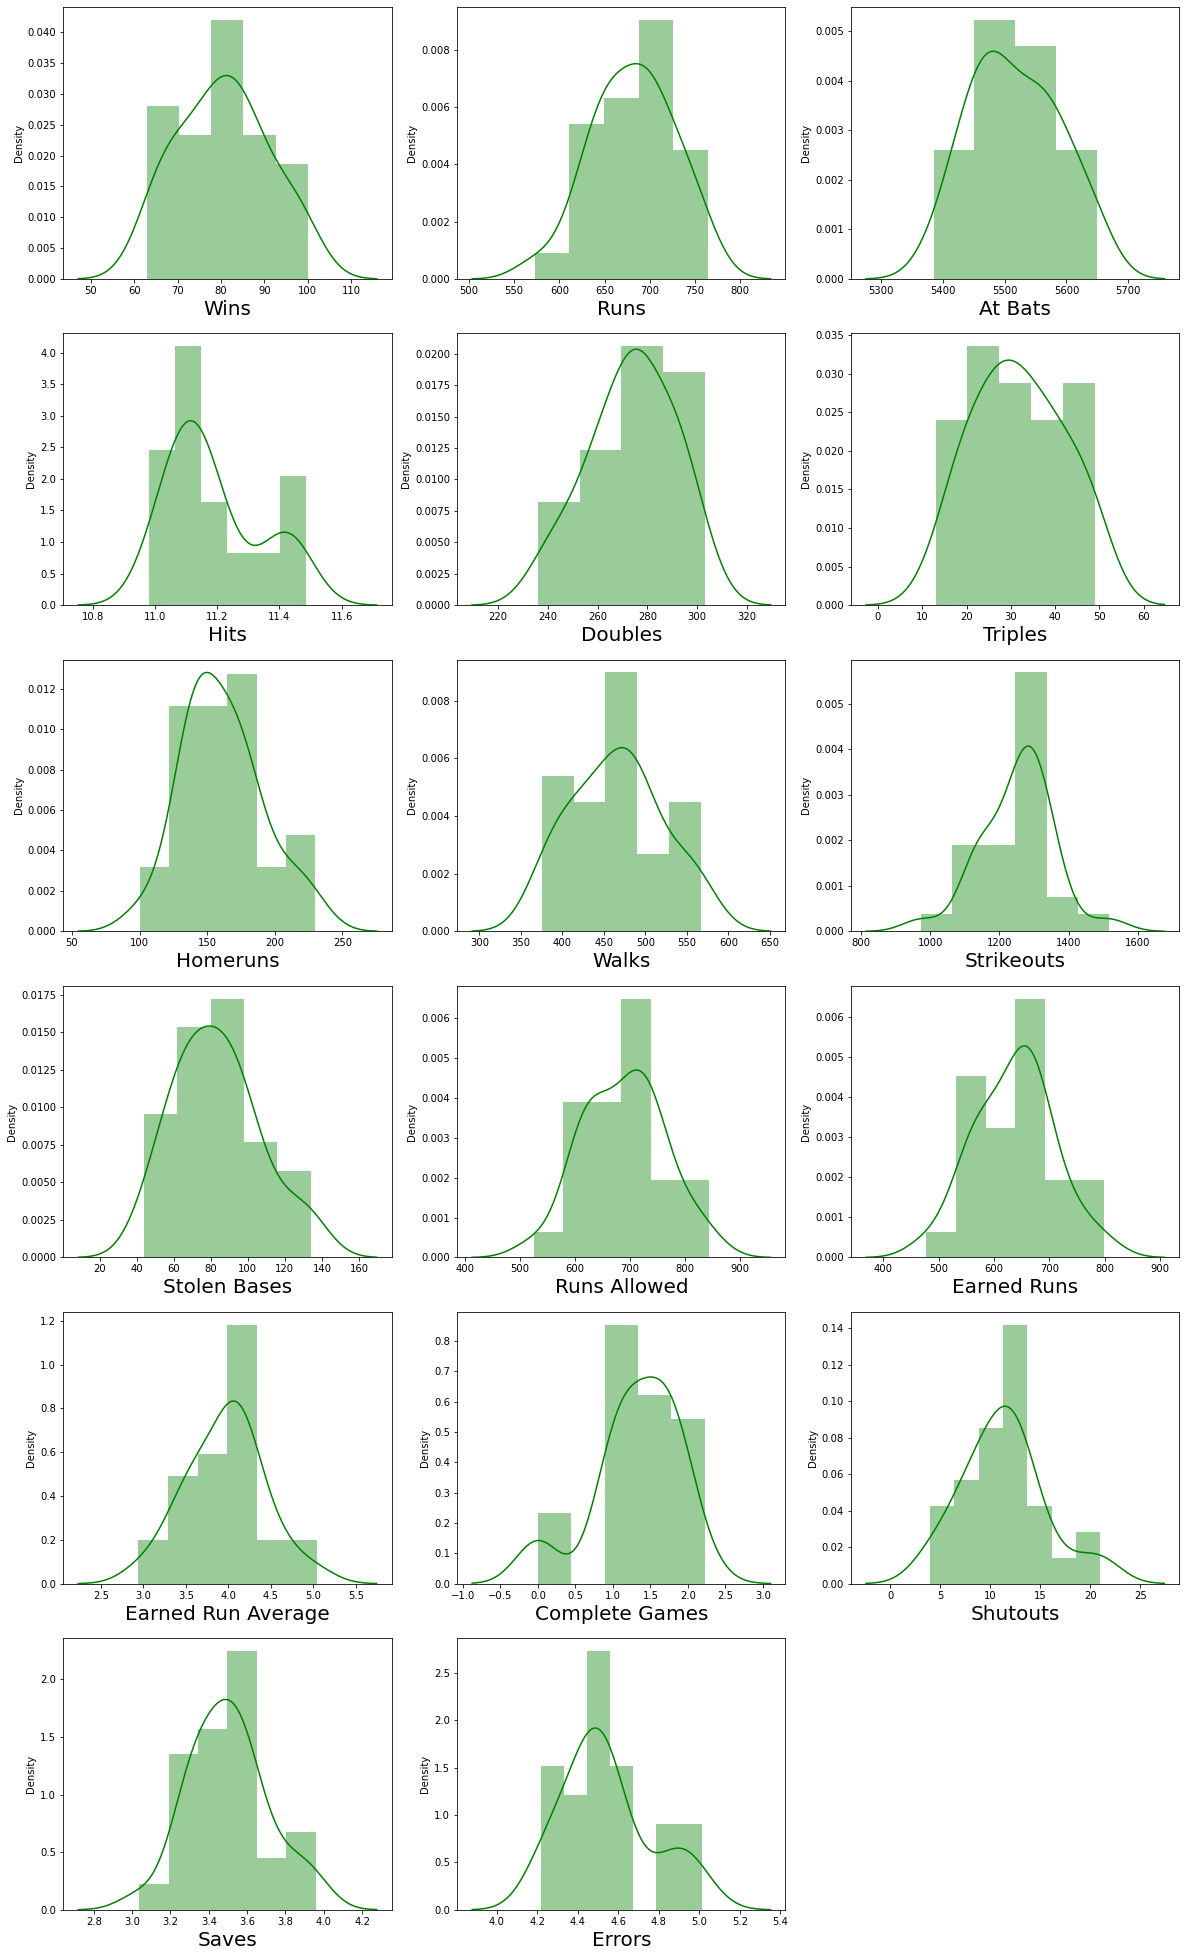

In [45]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in df_zscore_cbrt:
    if plot_number <=18:
        plt.subplot(6,3,plot_number)
        sns.distplot(df_zscore_cbrt[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe skewness is corrected and most of the columns data are normally distributed

#### Feature and Target Selection

In [46]:
x=df_zscore_cbrt.drop("Wins",axis=1)
y=df_zscore_cbrt["Wins"]

#### Applying Standard Scaler in order to check the Multicollinearity

In [47]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.95939835,  0.83008422,  1.72864714,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.09467183, -0.81326172,  1.58688197,
        -0.44822992],
       [ 0.33114717, -0.70283074, -0.94616151,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.09467183,  0.15929869,  0.27005039,
        -0.60464297],
       [-0.27466646, -1.10025314, -0.09470806,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  1.61560772, -0.32698152, -0.68423796,
        -1.17199438],
       [-1.32923093,  0.23395062, -0.3518386 , -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.06379443, -0.57012162, -0.82990684,
         0.51474557],
       [ 0.17408438,  1.25589393,  2

#### Obtaining Multicollinearity using Variance Inflation Factor

In [48]:
vif = pd.DataFrame()

In [49]:
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,Runs,7.097438
1,At Bats,16.824584
2,Hits,8.785400
3,Doubles,3.965512
4,Triples,3.305645
5,Homeruns,8.593125
6,Walks,3.618748
7,Strikeouts,2.904880
8,Stolen Bases,1.966001
9,Runs Allowed,199.932990


From above set, we can observe that Runs Allowed, Earned Runs Average and Earned Runs has the high multicollinearity comparatively. So, After analysing the Principal components, we can drop allowable columns with high multicollinearity

#### Principle Component Analysis 

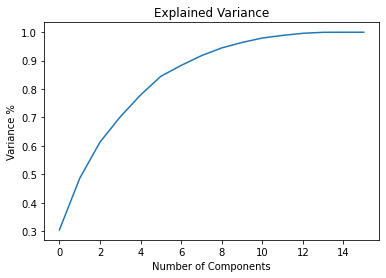

In [50]:
pca = PCA()
principle_components = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

We can conclude that for 95% variance, nearly 14 Principle components are contributing. So we can retain 14 components and build the model

In [51]:
pca_new = PCA(n_components=14)
new_components = pca_new.fit_transform(x_scaled)
x_principle=pd.DataFrame(new_components,columns=np.arange(14))
x_principle

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.045695,-2.981427,2.293667,0.422463,-2.347836,-0.509872,-0.944082,0.368736,0.802066,-0.528493,0.633756,-0.017190,-0.143601,0.177259
1,0.044414,0.431497,0.222826,-0.115963,-0.320780,0.323327,0.456197,1.611845,0.269135,-0.009186,-0.668237,-0.319321,-0.289482,0.519748
2,-1.131962,-0.726878,0.152646,-2.530079,-0.880205,-0.263751,-1.447159,0.150658,0.268459,1.282761,-0.546548,0.150590,-0.040271,-0.261802
3,0.727800,1.484533,0.775138,-0.766009,0.399253,-0.913566,0.135369,-0.164551,0.089888,0.618869,1.259891,-0.263435,0.879397,0.199108
4,3.443512,-1.396508,-0.648340,-1.429812,-0.193306,0.567574,1.039541,0.547284,-1.196085,0.228977,-0.053810,0.161218,0.147570,-0.327968
5,-0.345331,-0.328812,-2.860607,1.058079,-1.612730,-1.198223,-0.797617,-0.797132,-0.032313,-0.301861,-0.579432,-0.637081,0.493999,-0.032130
6,-0.808034,2.264536,-1.121958,2.644793,-1.746055,0.973959,1.467685,-0.259397,-0.008766,0.366155,-0.199283,0.118935,-0.081769,-0.045618
7,-1.400197,-0.034346,1.009900,1.163324,0.179605,-0.030235,-0.538939,1.087053,-0.697897,-0.519511,0.546054,-0.039589,-0.322535,-0.266200
8,2.152894,-2.028815,-0.965612,-0.128756,-1.132402,-1.068842,0.746018,-0.720555,-0.330844,0.118652,-0.214693,0.173677,-0.170761,0.115257
9,1.050080,-0.953684,-1.521170,0.143277,0.607009,-1.037425,-0.830516,0.018740,0.777418,-1.134203,-0.364165,0.632840,-0.064787,0.061471


### Selecting KBest Features

Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [52]:
best_features = SelectKBest(score_func = f_classif, k = 16)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)

In [53]:
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(22,'Scores'))

              Features    Scores
8         Stolen Bases  3.283197
15              Errors  2.814334
9         Runs Allowed  2.524616
0                 Runs  2.485509
14               Saves  2.190896
11  Earned Run Average  1.732208
10         Earned Runs  1.636442
1              At Bats  1.622586
7           Strikeouts  1.519889
13            Shutouts  1.253358
6                Walks  0.943327
5             Homeruns  0.818974
4              Triples  0.811129
3              Doubles  0.799063
2                 Hits  0.729214
12      Complete Games  0.503857


1. Upon reviewing Best Features Scores, found Complete Games has least score and also skewness was high for this so dropping this column would be best solution


2. Upon reviewing Multicollinearity using Variance Inflation Factor, Earned Runs has highest Multicollinearity followed by Earned Run Average. However, Earned Run Average data is derived from Earned Run Data so, optimal solution would be to drop Earned Run Average column for best model building

In [54]:
x_best = x.drop(columns = ['Earned Run Average','Complete Games']).copy() 

Dropping Earned Run Average and  Complete Games Column as reasoned in above observation notes 

In [55]:
x_best_scaled = sc.fit_transform(x_best)

Applying Standard Scaler since data variation is high and thus scaling will help in better accuracy

## Model Building: Regression Problem

 Finding the Best Random State 

In [56]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size = .23,random_state = i)
    mod_random_state =  Lasso()
    mod_random_state.fit(x_train,y_train)
    pred = mod_random_state.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"The Best Accuracy is: {maxAcc} at Random State: {maxRS}")

The Best Accuracy is: 0.9571553289612925 at Random State: 82


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size = .23, random_state =82)

### Random Forest Regressor Model

In [58]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_rf_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_rf_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test,y_rf_pred)))
print('Cross validation Score: ',cross_val_score(rf,x_best_scaled,y,cv=4).mean())

R2 Score:  0.6477326627218938
Mean Squared Error (MSE):  24.299257142857122
Root Mean Squared Error (RMSE):  4.929427668893938
Cross validation Score:  0.5009055003977406


### Ridge Regression Model

In [59]:
r=Ridge()
r.fit(x_train,y_train)
y_r_pred = r.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_r_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_r_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test,y_r_pred)))
print('Cross validation Score: ',cross_val_score(r,x_best_scaled,y, cv=4).mean())

R2 Score:  0.7185592341722891
Mean Squared Error (MSE):  19.413669153013533
Root Mean Squared Error (RMSE):  4.406094546535916
Cross validation Score:  0.5207146322077344


### Lasso Regression Model

In [60]:
l = Lasso()
l.fit(x_train,y_train)
y_l_pred = l.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_l_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_l_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test,y_l_pred)))
print('Cross validation Score: ',cross_val_score(l,x_best_scaled,y,cv=4).mean())

R2 Score:  0.9571553289612925
Mean Squared Error (MSE):  2.955407920629208
Root Mean Squared Error (RMSE):  1.7191299894508292
Cross validation Score:  0.738977773182034


### SVR Model

In [61]:
SV= SVR()
SV.fit(x_train,y_train)
y_SV_pred = SV.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_SV_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_SV_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test,y_SV_pred)))
print('Cross validation Score: ',cross_val_score(SV,x_best_scaled,y,cv=4).mean())

R2 Score:  0.1575870736081394
Mean Squared Error (MSE):  58.10929982049977
Root Mean Squared Error (RMSE):  7.62294561311438
Cross validation Score:  -0.04504916130864742


### AdaBoost Regressor Model

In [62]:
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
y_adb_pred = adb.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_adb_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_adb_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test,y_adb_pred)))
print('Cross validation Score: ',cross_val_score(adb,x_best_scaled,y,cv=4).mean())

R2 Score:  0.5306211961115807
Mean Squared Error (MSE):  32.3775583090379
Root Mean Squared Error (RMSE):  5.690128145221151
Cross validation Score:  0.5304173748974428


#### Consolidating all Model R2 Scores and Cross Validation Score

In [63]:
#R2_scores of all the models

R1 = r2_score(y_test,y_rf_pred).copy()
R2 = r2_score(y_test,y_r_pred).copy()
R3 = r2_score(y_test,y_l_pred).copy()
R4 = r2_score(y_test,y_SV_pred).copy()
R5 = r2_score(y_test,y_adb_pred).copy()

#Cross Validation Scores of all the models

C1 = cross_val_score(rf,x_best_scaled,y,cv=4).mean().copy()
C2 = cross_val_score(r,x_best_scaled,y, cv=4).mean().copy()
C3 = cross_val_score(l,x_best_scaled,y,cv=4).mean().copy()
C4 = cross_val_score(SV,x_best_scaled,y,cv=4).mean().copy()
C5 = cross_val_score(adb,x_best_scaled,y,cv=4).mean().copy()

In [64]:
Consolidated_Score = pd.DataFrame({'Model':['Random Forest Regressor','Ridge','Lasso','SVR','ABR'],'R2_Score':[R1,R2,R3,R4,R5],'Cross_Validation_Score':[C1,C2,C3,C4,C5]})
Consolidated_Score['Difference'] = Consolidated_Score['R2_Score'] - Consolidated_Score['Cross_Validation_Score']

In [65]:
Consolidated_Score

,Model,R2_Score,Cross_Validation_Score,Difference
0,Random Forest Regressor,0.647733,0.492075,0.155658
1,Ridge,0.718559,0.520715,0.197845
2,Lasso,0.957155,0.738978,0.218178
3,SVR,0.157587,-0.045049,0.202636
4,ABR,0.530621,0.594652,-0.064031


Least Difference is with AdaBoost Regressor and followed by Random Forest Regressor, However, Root Mean Squared Error and Mean Squared Error is high comparatively.

SVR Model is also having less difference but cross validation score is in negative and also Root Mean Squared Error and Mean Squared Error is high comparatively.

Ridge has less difference compared to Lasso, However, Root Mean Squared Error and Mean Squared Error is high comparatively with Lasso

Choosing Lasso as Best Model to proceed for Hyper Parameter Tuning since it has the low error values which would predict the target variable with better accuaracy

### Hyper Parameter Tuning Using Grid Search

#### Defining the Parameters list for Lasso Regressor

In [66]:
parameters = {'alpha': np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),
             'fit_intercept': [True,False],
             'normalize': [True,False],
             'max_iter': [1000,2000,3000],
             'random_state': np.arange(100),
             'selection': ["cyclic","random"]}

In [67]:
GridCV = GridSearchCV(Lasso(), parameters, cv=5, n_jobs = -1, verbose = 1)

In [68]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 26400 candidates, totalling 132000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 8208 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 24208 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 36976 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 47776 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 60976 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 76576 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 94576 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 114976 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 132000 out of 132000 | elapsed:  6.2min finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=1)

In [69]:
GridCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'random_state': 44,
 'selection': 'random'}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [70]:
Best_model = Lasso(alpha = 1, fit_intercept= True, normalize = False, max_iter = 1000, random_state = 44,selection ='random')

In [71]:
Best_model.fit(x_train,y_train)

Lasso(alpha=1, random_state=44, selection='random')

In [72]:
lpred = Best_model.predict(x_test)
R2_Score = r2_score(y_test,lpred)
print('R2 Score of Best Model is ',R2_Score*100)

R2 Score of Best Model is  95.71527620078842


### Saving the Best Model

In [73]:
joblib.dump(Best_model,"Baseball_Case_Study_Model.pkl")

['Baseball_Case_Study_Model.pkl']

### Loading the Best Model

In [74]:
model=joblib.load("Baseball_Case_Study_Model.pkl")

Upon review, found Predicted Value is almost close to the Actual Values